In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rasaalahmad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rasaalahmad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
file_path = r'train.csv'
df = pd.read_csv(file_path)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16407 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     16407 non-null  object
 1   Question  16407 non-null  object
 2   Answer    16407 non-null  object
dtypes: object(3)
memory usage: 384.7+ KB


In [3]:
df =df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16359 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     16359 non-null  object
 1   Question  16359 non-null  object
 2   Answer    16359 non-null  object
dtypes: object(3)
memory usage: 511.2+ KB


In [4]:
df = df.drop_duplicates(subset=['qtype', 'Question'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14979 entries, 0 to 16406
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   qtype     14979 non-null  object
 1   Question  14979 non-null  object
 2   Answer    14979 non-null  object
dtypes: object(3)
memory usage: 468.1+ KB


In [6]:
print(df['qtype'].value_counts())

qtype
information        3822
symptoms           2683
treatment          2213
inheritance        1382
frequency          1120
genetic changes    1087
causes              657
exams and tests     611
research            369
outlook             354
susceptibility      245
prevention          183
considerations      133
stages               76
complications        43
support groups        1
Name: count, dtype: int64


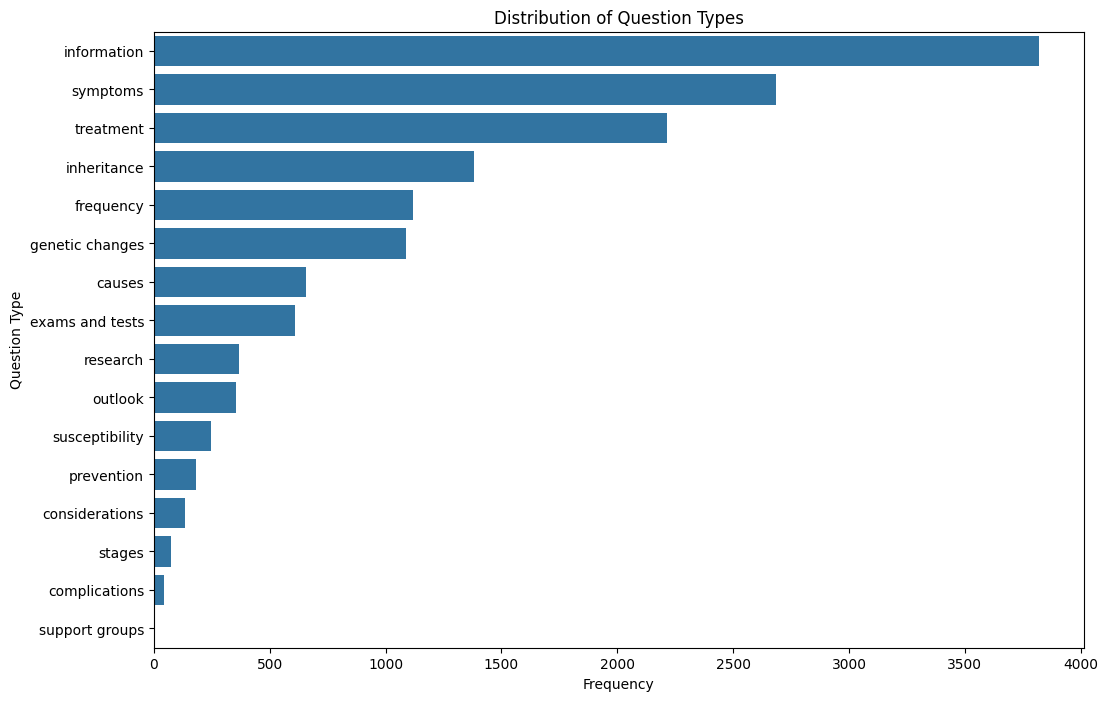

In [7]:
# Visualization of question type distribution
plt.figure(figsize=(12, 8))
sns.countplot(y=df['qtype'], order=df['qtype'].value_counts().index)
plt.title('Distribution of Question Types')
plt.xlabel('Frequency')
plt.ylabel('Question Type')
plt.show()

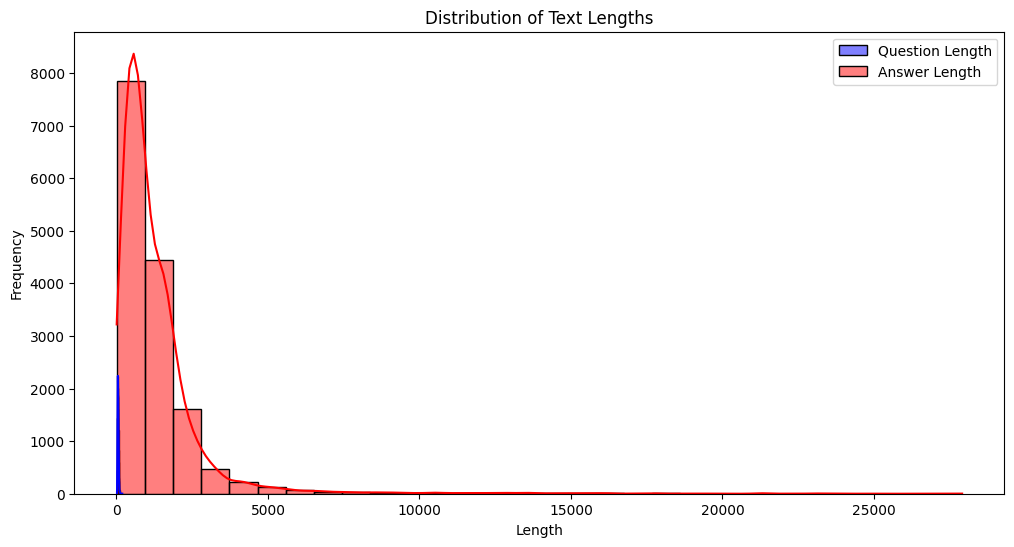

In [9]:
df['question_length'] = df['Question'].apply(len)
df['answer_length'] = df['Answer'].apply(len)

# Plotting the distribution of question and answer lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['question_length'], bins=30, color='blue', kde=True, label='Question Length')
sns.histplot(df['answer_length'], bins=30, color='red', kde=True, label='Answer Length')
plt.title('Distribution of Text Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [39]:
# Text normalization: Converting text to lowercase
df['Question'] = df['Question'].str.lower()
df['Answer'] = df['Answer'].str.lower()

# Removing extra whitespace
df['Question'] = df['Question'].apply(lambda x: re.sub(r'\s+', ' ', x))
df['Answer'] = df['Answer'].apply(lambda x: re.sub(r'\s+', ' ', x))

# Removing special characters, punctuation marks, or symbols
df['Question'] = df['Question'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
df['Answer'] = df['Answer'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Removing HTML tags, URLs, or other irrelevant information
df['Question'] = df['Question'].apply(lambda x: re.sub(r'<.*?>', '', x))  # Remove HTML tags
df['Answer'] = df['Answer'].apply(lambda x: re.sub(r'<.*?>', '', x))  # Remove HTML tags
df['Question'] = df['Question'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs
df['Answer'] = df['Answer'].apply(lambda x: re.sub(r'http\S+', '', x))  # Remove URLs


Split the dataset

In [8]:
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

Training set shape: (11234, 3)
Testing set shape: (3745, 3)


In [9]:
train_data_formatted = []
for index, row in train_data.iterrows():
    question = row['Question']  # Use 'qtype' as question
    answer = row['Answer']
    context = f"{question} {answer}"  # Concatenate question and answer to form context
    answer_start = context.find(answer)  # Find the index where the answer starts in the context
    qas = [
        {
            "id": str(index),
            "is_impossible": False,  # Assuming all questions have answers
            "question": question,  # Use 'qtype' as question
            "answers": [
                {
                    "text": answer,
                    "answer_start": answer_start,  # Use the index where the answer starts
                }
            ],
        }
    ]
    train_data_formatted.append({'context': context, 'qas': qas})


test_data_formatted = []
for index, row in test_data.iterrows():
    question = row['Question']  # Use 'qtype' as question
    answer = row['Answer']
    context = f"{question} {answer}"  # Concatenate question and answer to form context
    answer_start = context.find(answer)  # Find the index where the answer starts in the context
    qas = [
        {
            "id": str(index),
            "is_impossible": False,  # Assuming all questions have answers
            "question": question,  # Use 'qtype' as question
            "answers": [
                {
                    "text": answer,
                    "answer_start": answer_start,  # Use the index where the answer starts
                }
            ],
        }
    ]
    test_data_formatted.append({'context': context, 'qas': qas})


In [10]:
import json
# Define the file path for the JSON file
json_file_path = 'train_data_formatted.json'

# Write train_data_formatted to JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(train_data_formatted, json_file, indent=4)

Models

In [ ]:
!pip install simpletransformers

In [11]:
import warnings
warnings.filterwarnings("ignore", message="IProgress not found", category=UserWarning)


In [12]:
from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs

In [13]:
import multiprocessing
import wandb

Bert

In [14]:
wandb.init(project="bert_hyperparameter_tuning_nlp", entity="l216270")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: l216270. Use `wandb login --relogin` to force relogin


In [15]:
# Initialize the model
# Initialize the BERT model
model = QuestionAnsweringModel(
    'bert',  # Specify the model type
    'bert-base-uncased',  # Specify the pre-trained model name
    use_cuda=False,  # Set use_cuda=True if you have a GPU available
    args={
        'num_train_epochs': 1,  # Adjust the number of training epochs as needed
        "learning_rate": 1e-5, 
        "gradient_accumulation_steps": 2,
        'train_batch_size': 16,  # Adjust the batch size as needed
        'overwrite_output_dir': True,  # Overwrite the output directory
        'n_best_size': 5,  # Set n_best_size as 5
        'doc_stride': 128,  # Adjust doc_stride if needed
        'max_query_length': 128,  # Adjust max_query_length if needed
        "logging_steps": 10
    }
)

# Train the model
model.train_model(train_data_formatted)

/usr/local/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForQuestionAnswering were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
add example index and unique id: 100%|██████████| 11234/11234 [00:00<00:00, 709439.02it/s]


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/1832 [00:00<?, ?it/s]

wandb: Network error (ConnectionError), entering retry loop.


(916, 0.27872707542799885)

In [16]:
# Evaluate the model
result, texts = model.eval_model(test_data_formatted)
print(result)

add example index and unique id: 100%|██████████| 3745/3745 [00:00<00:00, 754704.68it/s]


Running Evaluation:   0%|          | 0/99 [00:00<?, ?it/s]

{'correct': 731, 'similar': 2719, 'incorrect': 295, 'eval_loss': -6.561846473000267}


In [17]:
model.save_model()

In [18]:
wandb.log(result)
wandb.log(texts)

In [19]:
random_samples = test_data.sample(n=100, random_state=42)

# Convert the random samples to a list of dictionaries
predict_data = random_samples.to_dict(orient='records')

In [23]:
# Initialize an empty list to store the formatted predict data
predict_data_formatted = []

# Iterate through each item in the predict_data list
for index, item in enumerate(predict_data):
    question = item['Question']  # Assuming the key for the question is 'Question'
    answer = item['Answer']  # Assuming the key for the answer is 'Answer'
    context = f"{question} {answer}"  # Concatenate question and answer to form context
    qas = [
        {
            "id": str(index),
            "question": question,
        }
    ]
    predict_data_formatted.append({'context': context, 'qas': qas})


In [33]:
model_predictions = model.predict(predict_data_formatted)
model_predictions

add example index and unique id: 100%|██████████| 100/100 [00:00<00:00, 113114.99it/s]


Running Prediction:   0%|          | 0/3 [00:00<?, ?it/s]

([{'id': '0',
   'answer': ['The outcome of aphasia is difficult to predict given the wide range of variability of the condition. Generally, people who are younger or have less extensive brain damage fare better. The location of the injury is also important and is another clue to prognosis. In general, people tend to recover skills in language comprehension more completely than those skills involving expression.',
    'The',
    '.',
    'Aphasia ? The outcome of aphasia is difficult to predict given the wide range of variability of the condition. Generally, people who are younger or have less extensive brain damage fare better. The location of the injury is also important and is another clue to prognosis. In general, people tend to recover skills in language comprehension more completely than those skills involving expression.',
    '? The outcome of aphasia is difficult to predict given the wide range of variability of the condition. Generally, people who are younger or have less ext

In [30]:
# Initialize an empty list to store reference answers
references = []

# Iterate through each item in the predict_data list
for item in predict_data:
    # Store the answer from each item
    answer = item['Answer']
    # Append the answer to the list of reference answers
    references.append([answer])


In [43]:
# Initialize an empty list to store predictions
predictions = []

# Iterate through each prediction result
for result in zip(*model_predictions):  # Assuming model_predictions is a tuple containing the predicted results
    probabilities = result[1]['probability']
    highest_probability_index = probabilities.index(max(probabilities))
    answer = result[0]['answer'][highest_probability_index]
    predictions.append(answer)


In [53]:
from nltk.translate.bleu_score import corpus_bleu
bleu_score = corpus_bleu(references, predictions)
print("BLEU Score:", bleu_score)

BLEU Score: 8.851395502390633e-06
